In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\\..\\data\\weather\\nyc_20191206_20191220.csv', skiprows=11, delimiter=',')

In [3]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Total Precipitation (high resolution) [sfc],Total Precipitation (low resolution) [sfc],...,Low Cloud Cover [low cld lay],Sunshine Duration [sfc],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],Wind Speed [80 m above gnd],Wind Direction [80 m above gnd],Wind Speed [900 mb],Wind Direction [900 mb],Wind Gust [sfc]
0,2019,12,6,0,0,30.28,70,1020.3,0.0,0.0,...,0,-999.0,0.0,21.41,297.37,24.53,298.90,35.69,319.32,23.04
1,2019,12,6,1,0,30.19,73,1020.6,0.0,0.0,...,0,0.0,0.0,19.72,294.82,22.71,296.31,31.86,318.70,21.25
2,2019,12,6,2,0,30.09,76,1020.9,0.0,0.0,...,0,0.0,0.0,18.20,290.89,20.56,292.38,29.44,313.15,19.24
3,2019,12,6,3,0,30.00,80,1021.2,0.0,0.0,...,0,0.0,0.0,16.50,285.73,18.62,286.04,28.79,304.55,17.67
4,2019,12,6,4,0,29.92,82,1021.3,0.0,0.0,...,0,0.0,0.0,14.53,279.75,16.29,278.69,29.31,296.76,15.88


In [4]:
df.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Minute',
       'Temperature  [2 m above gnd]', 'Relative Humidity  [2 m above gnd]',
       'Mean Sea Level Pressure  [MSL]',
       'Total Precipitation (high resolution)  [sfc]',
       'Total Precipitation (low resolution)  [sfc]',
       'Snowfall Amount (high resolution)  [sfc]',
       'Snowfall Amount (low resolution)  [sfc]', 'Total Cloud Cover  [sfc]',
       'High Cloud Cover  [high cld lay]', 'Medium Cloud Cover  [mid cld lay]',
       'Low Cloud Cover  [low cld lay]', 'Sunshine Duration  [sfc]',
       'Shortwave Radiation  [sfc]', 'Wind Speed  [10 m above gnd]',
       'Wind Direction  [10 m above gnd]', 'Wind Speed  [80 m above gnd]',
       'Wind Direction  [80 m above gnd]', 'Wind Speed  [900 mb]',
       'Wind Direction  [900 mb]', 'Wind Gust  [sfc]'],
      dtype='object')

In [5]:
newCols = ['Year', 'Month', 'Day', 'Hour', 'Minute',\
          'Temperature', 'RH', 'MSLP', 'TP_HR', 'TP_LR', \
           'SA_HR', 'SA_LR', 'TCC', 'HCC', 'MCC', 'LCC', \
           'SSD', 'SWR', 'WS_10', 'WD_10', 'WS_80', 'WD_80', \
          'WS_900', 'WD_900', 'WG']
df.columns = newCols

In [6]:
# Update date-time in a particular format
dateTimeStr = list()
for indx, row in df.iterrows():
    dateTimeStr.append(str(int(row["Month"])) + "/" + str(int(row["Day"])) + "/" + str(int(row["Year"])) + " " + \
                str(int(row["Hour"])) + ":" + str(int(row["Minute"])))

In [7]:
# set date-time index
df["DateTimeStr"] = pd.to_datetime(dateTimeStr)
df = df.set_index("DateTimeStr")

In [8]:
# updated data frame
df.head()

,Year,Month,Day,Hour,Minute,Temperature,RH,MSLP,TP_HR,TP_LR,...,LCC,SSD,SWR,WS_10,WD_10,WS_80,WD_80,WS_900,WD_900,WG
DateTimeStr,,,,,,,,,,,,,,,,,,,,,
2019-12-06 00:00:00,2019,12,6,0,0,30.28,70,1020.3,0.0,0.0,...,0,-999.0,0.0,21.41,297.37,24.53,298.90,35.69,319.32,23.04
2019-12-06 01:00:00,2019,12,6,1,0,30.19,73,1020.6,0.0,0.0,...,0,0.0,0.0,19.72,294.82,22.71,296.31,31.86,318.70,21.25
2019-12-06 02:00:00,2019,12,6,2,0,30.09,76,1020.9,0.0,0.0,...,0,0.0,0.0,18.20,290.89,20.56,292.38,29.44,313.15,19.24
2019-12-06 03:00:00,2019,12,6,3,0,30.00,80,1021.2,0.0,0.0,...,0,0.0,0.0,16.50,285.73,18.62,286.04,28.79,304.55,17.67
2019-12-06 04:00:00,2019,12,6,4,0,29.92,82,1021.3,0.0,0.0,...,0,0.0,0.0,14.53,279.75,16.29,278.69,29.31,296.76,15.88


# Temperature, RH, and Total Cloud Cover

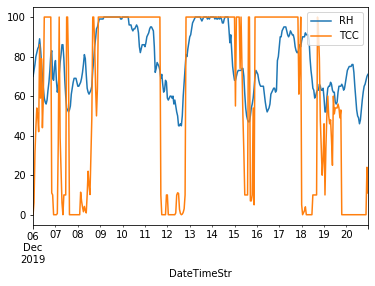

In [12]:
# Plot Takeaways
# 1. Humidity is high when the cloud cover is high with an exception on Dec 16, 2019 and Dec 20

df[['RH', 'TCC']].plot()